In [1]:
import sys
sys.path.append("/Users/irisstone/Google Drive (istone@princeton.edu)/Princeton/Research/Striatum Towers Task/code/glmhmm")
import matplotlib.pyplot as plt
import numpy as np
from glmhmm import hmm
from glmhmm.utils import permute_states, find_best_fit
from glmhmm.visualize import plot_transitions

In [2]:
# set the parameters of the GLM
N = 10000 # number of data/time points
K = 2 # number of latent states
C = 2 # number of observation classes

In [3]:
# make a HMM with these parameters and set distribution type
true_HMM = hmm.HMM(N,0,C,K)
A_true,phi_true,pi_true = true_HMM.generate_params()
true_y,true_z = true_HMM.generate_data(A_true,phi_true)
#true_ll = true_GLM.neglogli(true_x,true_w,true_y) * -1

In [4]:
# fit model
inits = 1
lls_all = np.zeros((inits,250))
A_all = np.zeros((inits,K,K))
phi_all = np.zeros((inits,K,C))
for i in range(inits):
    A_init,phi_init,pi_init = true_HMM.generate_params()
    lls_all[i,:],A_all[i,:,:],phi_all[i,:,:],pi0 = true_HMM.fit(true_y,A_init,phi_init)
    print('initialization %s complete' %(i+1))
# fit_ll = true_GLM.ll
# fit_ll = true_GLM.neglogli(true_x,w,true_y) * -1

initialization 1 complete


Text(0, 0.5, 'loglikelihood')

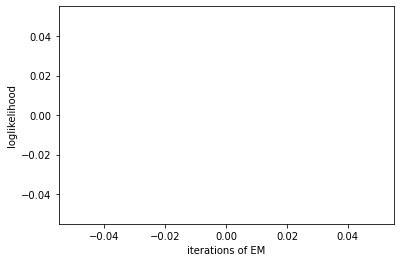

In [5]:
plt.plot(lls_all.T[50:])
plt.xlabel('iterations of EM')
plt.ylabel('loglikelihood')

In [6]:
bestix = find_best_fit(lls_all)
A_permuted, order = permute_states(A_all[bestix])
A_true_permuted, order = permute_states(A_true)

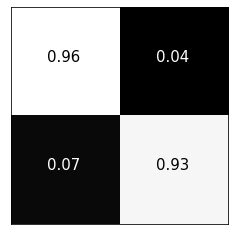

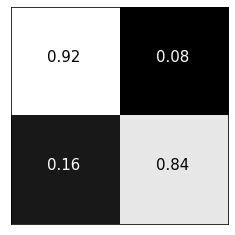

In [7]:
fig = plot_transitions(A_true_permuted)
fig = plot_transitions(A_permuted)

In [8]:
true_ll,_,_ = true_HMM.forwardPass(true_y,A_true,phi_true,pi0=None)
fit_ll,_,_ = true_HMM.forwardPass(true_y,A_all[bestix],phi_all[bestix])

# compare loglikelihoods
print('True LL: %f' %(true_ll))
print('Fit LL: %f' %(fit_ll))

True LL: -6285.613221
Fit LL: -6333.860387


If the data is difficult to fit, we can also try a method called direct annealing EM, or DAEM (for more information, see [Ueda and Nakano 1998](https://www.sciencedirect.com/science/article/pii/S0893608097001330)). In short, this applies a temperature parameter $B$ to our posterior, starting at a low value ($B<1$), which tends to produce faster convergence of the log-likelihood than traditional EM. The estimates of the fitted parameters then become initial parameter values (presumably closer to the correct parameter values than random initializations) for a second round of EM, with $B$ increased. This process continues iteratively, with $B$ increasing in each round of EM by a pre-specified step size, until $B=1$. 

In [ ]:
# fit model
inits = 1
lls_all = np.zeros((inits,250))
A_all = np.zeros((inits,K,K))
phi_all = np.zeros((inits,K,C))
for i in range(inits):
    A_init,phi_init,pi_init = true_HMM.generate_params()
    lls_all[i,:],A_all[i,:,:],phi_all[i,:,:],pi0 = true_HMM.fit(true_y,A_init,phi_init,B=0.5)
    print('initialization %s complete' %(i+1))